In [1]:
!pip install ultralytics

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.core.magic import register_line_cell_magic
import yaml
from PIL import Image
import os
import seaborn as sns
from ultralytics import YOLO
from matplotlib.patches import Rectangle
import glob
import cv2


In [2]:
warnings.filterwarnings("ignore")

np.random.seed(12345)

%matplotlib inline

!wandb disabled

'wandb' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
Input_path = '/kaggle/input/construction-site-safety-image-dataset-roboflow/css-data'
Work_path = '/kaggle/working/'

In [5]:
num_classes = 10
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

In [6]:
dict_file = {'train': os.path.join(Input_path, 'train'),
             'val': os.path.join(Input_path, 'valid'),
             'test': os.path.join(Input_path, 'test'),
             'nc': num_classes,
             'names': classes
            }

with open(os.path.join(Work_path, 'data.yaml'), 'w+') as file:
    yaml.dump(dict_file, file)

In [7]:
class_idx = {str(i):classes[i] for i in range(num_classes)}

class_stat = {}
data_len = {}

for mode in ['train', 'valid', 'test']:

    class_count = {classes[i]:0 for i in range(num_classes)}

    path = os.path.join(Input_path, mode, 'labels')

    for file in os.listdir(path):

        with open(os.path.join(path, file)) as f:
            lines = f.readlines()

            for cls in set([line[0] for line in lines]):
                class_count[class_idx[cls]] += 1
                
    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count

In [8]:
class_stat

{'train': {'Hardhat': 1314,
  'Mask': 1096,
  'NO-Hardhat': 1380,
  'NO-Mask': 1531,
  'NO-Safety Vest': 1864,
  'Person': 2526,
  'Safety Cone': 631,
  'Safety Vest': 1319,
  'machinery': 2101,
  'vehicle': 744},
 'valid': {'Hardhat': 42,
  'Mask': 19,
  'NO-Hardhat': 37,
  'NO-Mask': 44,
  'NO-Safety Vest': 56,
  'Person': 84,
  'Safety Cone': 13,
  'Safety Vest': 28,
  'machinery': 26,
  'vehicle': 16},
 'test': {'Hardhat': 30,
  'Mask': 16,
  'NO-Hardhat': 25,
  'NO-Mask': 30,
  'NO-Safety Vest': 36,
  'Person': 59,
  'Safety Cone': 8,
  'Safety Vest': 22,
  'machinery': 22,
  'vehicle': 15}}

In [9]:
data_len

{'train': 2605, 'valid': 114, 'test': 82}

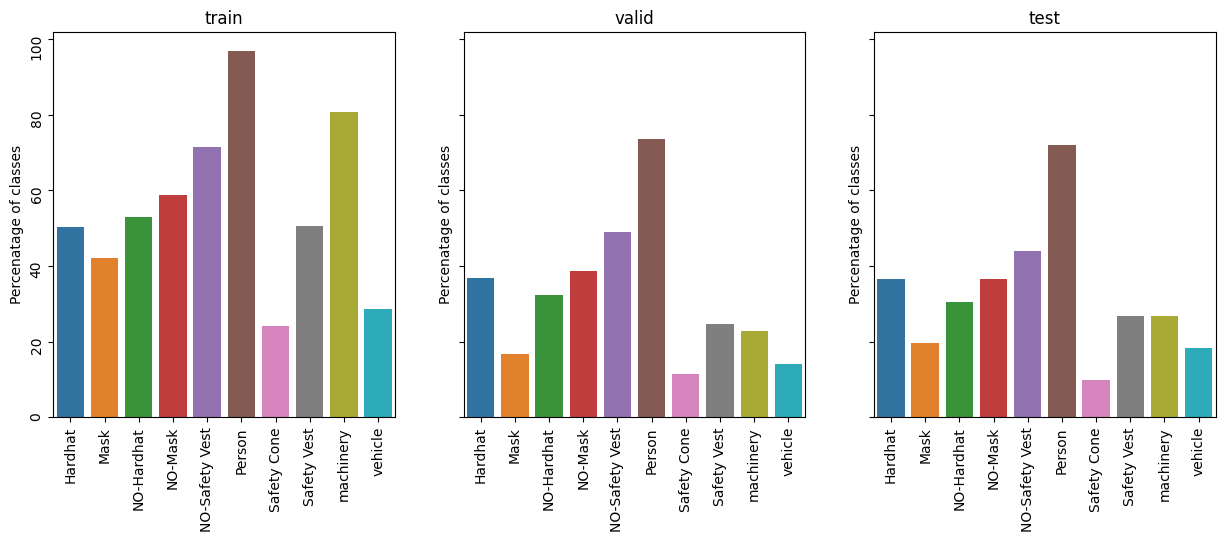

In [10]:
fig, ax = plt.subplots(1,3, figsize=(15, 5), sharey=True)

for i, mode in enumerate(['train', 'valid', 'test']):
    sns.barplot(pd.DataFrame({mode:class_stat[mode]}).T/data_len[mode]*100, ax=ax[i])
    ax[i].set_title(mode)
    ax[i].tick_params(rotation=90)
    ax[i].set_ylabel('Percenatage of classes')
plt.show()

In [11]:
for mode in ['train', 'valid', 'test']:
    print(f'\nImage sizes in {mode} set:\n')
    img_size = 0
    for file in glob.glob(os.path.join(Input_path, mode, 'images', '*')):
        image = Image.open(file)
        if image.size != img_size:
            print(f'\t{image.size}')
            img_size = image.size


Image sizes in train set:

	(640, 640)

Image sizes in valid set:

	(640, 640)

Image sizes in test set:

	(640, 640)


In [12]:
for mode in ['train', 'valid', 'test']:
    
    files =  glob.glob(os.path.join(Input_path, mode, 'images', '*'))
        
    print(f'{mode} set size: {len(files)}\n')

train set size: 2605

valid set size: 114

test set size: 82



- Load `pre-trained` YOLO-nano model 

In [13]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 270MB/s]


<h4 style="border-bottom: 3px solid #FAD7A0; padding: 12px 12px; font-family: Sans-Serif; color:black">
<b>Train</b></h4>

In [14]:
model.train(data=os.path.join(Work_path,'data.yaml'),
            task='detect',
            imgsz=640,
            epochs=50,
            batch=32,
            mode='train',
            name='yolov8m_v1_train')

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8m_v1_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 22.9MB/s]
2024-04-20 17:49:55,440	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-20 17:49:56,392	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-20 17:49:58.783482: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 17:49:58.783582: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 17:49:58.907438: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 96.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:02<00:00, 1150.37it/s]

train: WARNING ⚠️ /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 940.51it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/valid is not writeable, cache not saved.


Plotting labels to runs/detect/yolov8m_v1_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8m_v1_train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50        15G      1.268      1.947      1.431        236        640: 100%|██████████| 82/82 [01:36<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all        114        697      0.647      0.493      0.516      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      14.8G      1.191      1.349      1.368        218        640: 100%|██████████| 82/82 [01:31<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697      0.568      0.548      0.542      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      14.5G      1.178      1.295       1.36        227        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        114        697      0.618      0.451      0.478      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      14.8G       1.18      1.305      1.366        274        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        114        697      0.635      0.546      0.538      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      14.8G      1.141      1.225      1.337        287        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697      0.673      0.542       0.58      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      14.8G      1.116      1.161      1.315        235        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        114        697      0.784       0.56       0.63      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      14.4G      1.095      1.092      1.297        241        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        114        697      0.704      0.598      0.631      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      14.5G      1.043      1.019      1.269        302        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697       0.78      0.596      0.662      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      14.5G      1.029     0.9841      1.256        327        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.714      0.572      0.616      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      14.7G      1.006     0.9477      1.241        223        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        114        697      0.788      0.654      0.718      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        15G     0.9861     0.9127      1.227        226        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697      0.815      0.634      0.704      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      14.5G     0.9701     0.8778      1.218        278        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697       0.77      0.683      0.713      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      14.8G     0.9524     0.8557      1.205        263        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        114        697      0.808      0.659      0.721      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      14.8G     0.9182     0.8049      1.182        265        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.825       0.64      0.714      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      14.8G      0.924      0.803      1.182        304        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.823      0.686      0.756      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      14.5G     0.9073     0.7812       1.17        349        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697      0.909      0.644      0.751      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        15G      0.895     0.7616      1.161        241        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.861      0.672      0.753      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      14.5G     0.8918     0.7468      1.152        301        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697      0.851       0.68      0.766      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      14.5G     0.8532     0.7157      1.138        254        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        114        697       0.85      0.674      0.754      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      14.5G     0.8538     0.7008      1.129        228        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        114        697      0.853      0.716      0.784      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      14.5G     0.8419     0.6873      1.124        260        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697      0.886       0.72      0.789      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      14.7G     0.8143     0.6639      1.116        232        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697      0.863      0.704      0.789      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      14.5G     0.8067     0.6496      1.109        270        640: 100%|██████████| 82/82 [01:31<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        114        697      0.869      0.732      0.795      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      14.6G     0.8081     0.6448       1.11        316        640: 100%|██████████| 82/82 [01:31<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        114        697      0.882      0.722      0.788       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      14.6G     0.7874     0.6288        1.1        189        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697      0.888       0.73        0.8      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      14.5G     0.7809     0.6118      1.088        288        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697      0.901      0.749       0.82      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      14.5G     0.7659     0.5982      1.083        254        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        114        697      0.899      0.748      0.829      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      14.5G     0.7488     0.5818      1.072        360        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        114        697      0.883       0.76      0.832      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      14.5G     0.7525     0.5784      1.069        240        640: 100%|██████████| 82/82 [01:31<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        114        697       0.92      0.761      0.828      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      14.6G      0.745     0.5738      1.071        187        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.905       0.73      0.816      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      14.5G     0.7368     0.5597      1.059        226        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        114        697      0.927      0.748       0.82      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        15G     0.7202     0.5504      1.053        306        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.913      0.739      0.823      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      14.5G     0.7069     0.5332      1.041        339        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        114        697      0.911      0.763      0.833      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      14.5G     0.7013     0.5287      1.043        234        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.913      0.762      0.835       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      14.8G     0.6936     0.5196      1.036        197        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697      0.925      0.749      0.844      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      14.5G     0.6797     0.5119      1.031        261        640: 100%|██████████| 82/82 [01:30<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.913      0.749      0.844      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      14.5G     0.6798     0.5012      1.028        348        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.918      0.772      0.854      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      14.5G     0.6606     0.4927       1.02        180        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        114        697      0.897      0.792      0.857      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      14.5G     0.6658     0.4898      1.017        337        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.941       0.76       0.85      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      14.5G     0.6501     0.4781       1.01        299        640: 100%|██████████| 82/82 [01:30<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.924      0.783      0.855      0.578


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        15G      0.653     0.4231      1.007        167        640: 100%|██████████| 82/82 [01:33<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.935      0.779      0.857      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        15G     0.6318     0.3961     0.9943        138        640: 100%|██████████| 82/82 [01:30<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697      0.933      0.791      0.864      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        15G     0.6234     0.3905     0.9877        144        640: 100%|██████████| 82/82 [01:30<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.934      0.804      0.865      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      14.4G     0.6158     0.3843     0.9826        192        640: 100%|██████████| 82/82 [01:30<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697      0.933      0.796      0.858      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      14.6G     0.5997     0.3727     0.9745        230        640: 100%|██████████| 82/82 [01:30<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        114        697      0.954      0.774      0.862      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      14.4G     0.5893     0.3648     0.9715        168        640: 100%|██████████| 82/82 [01:30<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        114        697      0.932      0.789      0.865      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50        15G     0.5693     0.3569     0.9631        126        640: 100%|██████████| 82/82 [01:30<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.943      0.794      0.866       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        15G     0.5661      0.352     0.9584        174        640: 100%|██████████| 82/82 [01:30<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        114        697      0.948      0.795      0.866      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        15G     0.5541     0.3442     0.9525        149        640: 100%|██████████| 82/82 [01:30<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        114        697      0.934      0.792      0.865      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        15G     0.5456     0.3392     0.9472        186        640: 100%|██████████| 82/82 [01:30<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        114        697      0.941      0.798      0.867      0.602



50 epochs completed in 1.313 hours.
Optimizer stripped from runs/detect/yolov8m_v1_train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8m_v1_train/weights/best.pt, 52.0MB

Validating runs/detect/yolov8m_v1_train/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]


                   all        114        697      0.933      0.792      0.866      0.605
               Hardhat        114         79      0.971      0.823      0.928      0.656
                  Mask        114         21      0.981      0.952      0.962      0.739
            NO-Hardhat        114         69      0.928      0.594      0.753      0.469
               NO-Mask        114         74      0.937      0.703      0.757       0.46
        NO-Safety Vest        114        106      0.954      0.776      0.856      0.559
                Person        114        166       0.94      0.795        0.9      0.623
           Safety Cone        114         44      0.909      0.886      0.919      0.582
           Safety Vest        114         41      0.902      0.878      0.922      0.724
             machinery        114         55      0.991      0.891      0.962       0.74
               vehicle        114         42      0.813      0.623        0.7        0.5
Speed: 0.2ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7be0faf15450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [3]:
model = YOLO(r"C:\Users\DELL\Desktop\INHOUSE_INTERNSHIP\yolo-weights.pt")

In [4]:
str(model)

"YOLO(\n  (model): DetectionModel(\n    (model): Sequential(\n      (0): Conv(\n        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)\n        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)\n        (act): SiLU(inplace=True)\n      )\n      (1): Conv(\n        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)\n        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)\n        (act): SiLU(inplace=True)\n      )\n      (2): C2f(\n        (cv1): Conv(\n          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)\n          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)\n          (act): SiLU(inplace=True)\n        )\n        (cv2): Conv(\n          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)\n          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affin

In [5]:
def ppe_predict(img_path):
    img = img_path
    results = model(img, verbose=False) 
    for r in results:
        im_array = r.plot()
        im = Image.fromarray(im_array[..., ::-1])
    return np.array(im)  # Convert PIL image to numpy array

In [6]:
img = r"C:\Users\DELL\Desktop\INHOUSE_INTERNSHIP\data\test\images\youtube-186_jpg.rf.1f1d93447d4be3233c22c4ce9f6e0601.jpg"

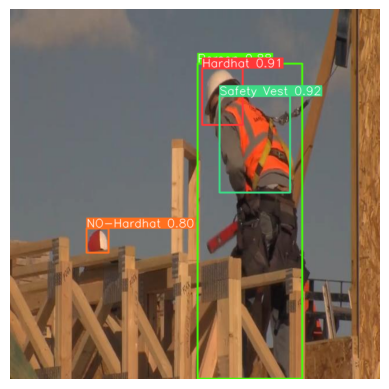

In [7]:
q = ppe_predict(img)
plt.imshow(q)
plt.axis('off')
plt.show()

In [8]:
img1 = r"C:\Users\DELL\Desktop\INHOUSE_INTERNSHIP\data\test\images\ppe_1073_jpg.rf.72ea8a293a4f3e1135219e33701b1099.jpg"

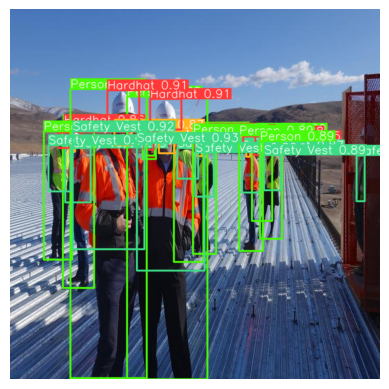

In [9]:
r= ppe_predict(img1)
plt.imshow(r)
plt.axis('off')
plt.show()

NO SAFETY

In [10]:
def no_safety_detect(img_path):
    img = img_path
    results = model(img,verbose=False,classes=[2,3,4])
    for r in results:
        im_array = r.plot()
        im = Image.fromarray(im_array[..., ::-1])
    return np.array(im)

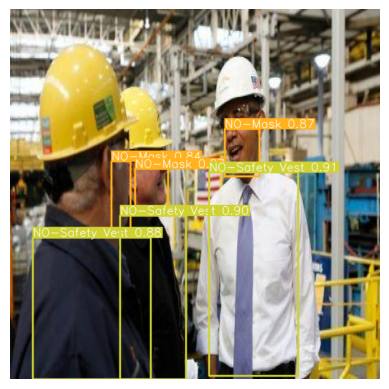

In [12]:
img1 = r"C:\Users\DELL\Desktop\INHOUSE_INTERNSHIP\data\test\images\004763_jpg.rf.46484e6ca73caeaa9de45822cf1085a9.jpg"
r= no_safety_detect(img1)
plt.imshow(r)
plt.axis('off')
plt.show()

REAL-TIME IMPLEMENATATION

In [10]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
# def ppe_predict_video(img_path):
#     img = img_path
#     results = model(img, verbose=False) 
#     for r in results:
#         im_array = r.plot()
#         im = Image.fromarray(im_array[..., ::-1])
#         return im
#         # plt.imshow(im)
#         # plt.axis('off')  # Hide axis
#         # plt.show()

In [12]:
# Initialize video capture
cap = cv2.VideoCapture(r"C:\Users\DELL\Desktop\INHOUSE_INTERNSHIP\archive\source_files\source_files\indianworkers.mp4")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize frame to match model input size (if needed)
    frame_resized = cv2.resize(frame, (640, 640))

    # Process the frame using your model
    processed_frame = ppe_predict(frame_resized)

    cv2.imshow('Processed Video', processed_frame)

    # Delay for 1 second (1000 milliseconds)
    cv2.waitKey(1000)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()

In [13]:
import numpy as np
import cv2
import os

In [14]:
def ppe_predict(img_path):
    img = img_path
    results = model(img, verbose=False) 
    for r in results:
        im_array = r.plot()
        im = Image.fromarray(im_array[..., ::-1])
    return np.array(im)  # Convert PIL image to numpy array

In [16]:
# Initialize video capture
input_video_path = r"C:\Users\DELL\Desktop\INHOUSE_INTERNSHIP\archive\source_files\source_files\indianworkers.mp4"
cap = cv2.VideoCapture(input_video_path)  

In [19]:
# # Get video properties
# frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [20]:
frame_width=640
frame_height=640

In [21]:
print(frame_width,frame_height,fps)

640 640 29


In [22]:
# # Define the codec and create VideoWriter object
# output_video_path = 'processed_video.mp4'
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
# out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

In [23]:
out = cv2.VideoWriter('processed_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

In [24]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize frame to match model input size (if needed)
    frame_resized = cv2.resize(frame, (640, 640))

    # Process the frame using your model
    processed_frame = ppe_predict(frame_resized)

    # Write the processed frame to the output video
    out.write(processed_frame)

# Release video capture and close writer
cap.release()
out.release()
cv2.destroyAllWindows()

# print(f"Processed video saved at: {output_video_path}")